
<div style="text-align:center">
    <h1><b>Tugas Besar Pengolahan Citra Digital</b></h1>
    <h1><b>FishScan: Identifikasi Ikan Berbasis Aplikasi </b></h1>
</div>
<br><br>
<br><br>
<table style="width:100%;">
    <tr>
        <td align="center" style="border:none;">
            <img src="LOGO UNRAM.png" alt="Foto" width="500" height="500">
        </td>
    </tr>
</table>
<br><br>
<br><br>
<div style="text-align:center;">
    <h2><b>Disusun Oleh:</b></h2>
    <h2>Muhamad Erwin Hariadinata   (F1D022065)</h2>
    <h2>Muhammad Nune Huria Sakti   (F1D022075)</h2>
    <h2>Nadya Azzahra               (F1D022083)</h2>
    <h2>Safira Dwirizqia            (F1D022096)</h2>
    <h2>Muhammad Akbar Setiadi      (F1D022140)</h2>
</div>
<br><br><br><br>
<div style="text-align:center">
    <h2><b>UNIVERSITAS MATARAM</b></h2>
    <h2><b>FAKULTAS TEKNIK</b></h2>
    <h2><b>TEKNIK INFORMATIKA</b></h2>
    <h2><b>2023/2024</b></h2>
</div>
<br><br><br><br>


### **Import Library**

#### **Menyediakan Library Yang Akan Digunakan**

> `import pandas as pd` : Pustaka pandas adalah pustaka yang digunakan untuk manipulasi dan analisis data tabular. Salah satu fitur utama pandas adalah DataFrame, yang merupakan struktur data berbentuk tabel dengan label pada baris dan kolom.

> `import matplotlib.pyplot as plt` : Pustaka matplotlib.pyplot adalah digunakan untuk membuat visualisasi data di Python. Pustaka ini menyediakan antarmuka seperti MATLAB untuk membuat plot, grafik, dan gambar lainnya.

> `import seaborn as sns` : Pustaka seaborn adalah pustaka visualisasi data yang dibangun di atas matplotlib. Pustaka ini menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif.

> `import numpy as np` : Pustaka numpy adalah pustaka yang menyediakan array multidimensi (ndarray) dan berbagai fungsi untuk operasi matematika tingkat tinggi pada array tersebut.

> `import os :` Pustaka os menyediakan fungsi untuk berinteraksi dengan sistem operasi, seperti manipulasi file dan direktori.

> `import cv2 :` Pustaka OpenCV digunakan untuk pemrosesan gambar. Pustaka ini menyediakan berbagai fungsi untuk membaca, menulis, dan memanipulasi gambar.

> `import random :` Pustaka random digunakan untuk menghasilkan angka acak dan melakukan operasi acak lainnya, seperti memilih elemen acak dari sebuah list.

> `from Preprocessing import EdgeDetection, Enchantment, Morphology :` Mengimpor modul atau kelas khusus dari file Preprocessing untuk melakukan pemrosesan gambar, seperti deteksi tepi, peningkatan citra, dan morfologi.

> `from skimage.feature import graycomatrix, graycoprops :` Fungsi graycomatrix dan graycoprops dari skimage.feature digunakan untuk menghitung matriks ko-ocurrence tingkat abu-abu (GLCM) dan properti tekstur dari gambar.

> `from sklearn.model_selection import train_test_split :` Fungsi train_test_split dari scikit-learn digunakan untuk membagi dataset menjadi set pelatihan dan set pengujian.


> `from sklearn.decomposition import PCA :` Fungsi PCA dari scikit-learn digunakan untuk analisis komponen utama, yang merupakan teknik pengurangan dimensi.

> `from sklearn.preprocessing import StandardScaler :` Fungsi StandardScaler dari scikit-learn digunakan untuk menstandarisasi fitur dengan menghilangkan mean dan menskalakan ke varians satuan.

> `from sklearn.metrics import confusion_matrix :` Fungsi confusion_matrix dari scikit-learn digunakan untuk menghitung confusion matriks untuk mengevaluasi akurasi klasifikasi.

> `from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score :` Fungsi-fungsi ini dari scikit-learn digunakan untuk menghitung metrik evaluasi model seperti akurasi, presisi, recall, dan skor F1.

> `from sklearn.neighbors import KNeighborsClassifier :` KNeighborsClassifier dari scikit-learn adalah algoritma klasifikasi berbasis K-Nearest Neighbors untuk melatih model dan menghitung akurasi objek yang digunakan.

> `from sklearn.ensemble import RandomForestClassifier :` RandomForestClassifier dari scikit-learn adalah algoritma klasifikasi berbasis ensambel yang menggunakan banyak pohon keputusan untuk melatih model dan menghitung akurasi objek yang digunakan.

> `from sklearn.svm import SVC :` SVC dari scikit-learn adalah algoritma klasifikasi berbasis Support Vector Machine untuk melatih model dan menghitung akurasi objek yang digunakan.

> `from sklearn.discriminant_analysis import LinearDiscriminantAnalysis :` LinearDiscriminantAnalysis dari scikit-learn adalah algoritma klasifikasi berbasis analisis diskriminan linier.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import os 
import cv2
import random
from Preprocessing import EdgeDetection, Enchantment, Morphology
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


### Data Loading

> `dataset_directory` digunakan untuk memanggil folder tempat dataset disimpan. Pada program ini, dataset berada di folder utama `Fish Dataset`

> `get_images_and_labels` merupakan fungsi untuk melakukan pembacaan dan pengambilan citra dalam suatu sub-folder dengan membuat variabel simpan bernama `all_images`, `all_labels`, `data_distribution`

In [2]:
dataset_directory = r'Fish Dataset'

def get_images_and_labels(dataset_directory):
    all_images = []
    all_labels = []
    data_distribution = {}

    folders = os.listdir(dataset_directory)
    for folder in folders:
        folder_path = os.path.join(dataset_directory, folder)
        if os.path.isdir(folder_path):
            images = os.listdir(folder_path)
            data_distribution[folder] = len(images)
            for image_file in images:
                image_path = os.path.join(folder_path, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    all_images.append(image)
                    all_labels.append(folder)
    return np.array(all_images), np.array(all_labels), data_distribution

In [3]:
def display_sample(images, labels=None, rows=1, cols=8, cmap=None):
    plt.figure(figsize=(20, 10))
    num_images = min(len(images), rows * cols)
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        img = images[i]
        plt.imshow(img, cmap=cmap)
        if labels is not None:
            plt.xlabel(f"ID: {labels[i]}")
    plt.show()

    
def plot_data_distribution(data_distribution):
    plt.figure(figsize=(15, 5))
    plt.bar(data_distribution.keys(), data_distribution.values())
    plt.xlabel('Label')
    plt.ylabel('Number of Images')
    plt.title('Data Distribution')
    plt.show()

def print_data_characteristic(data_distribution):
    print("Data Characteristics:")
    for label, count in data_distribution.items():
        print(f"Label: {label}, Number of Images: {count}")

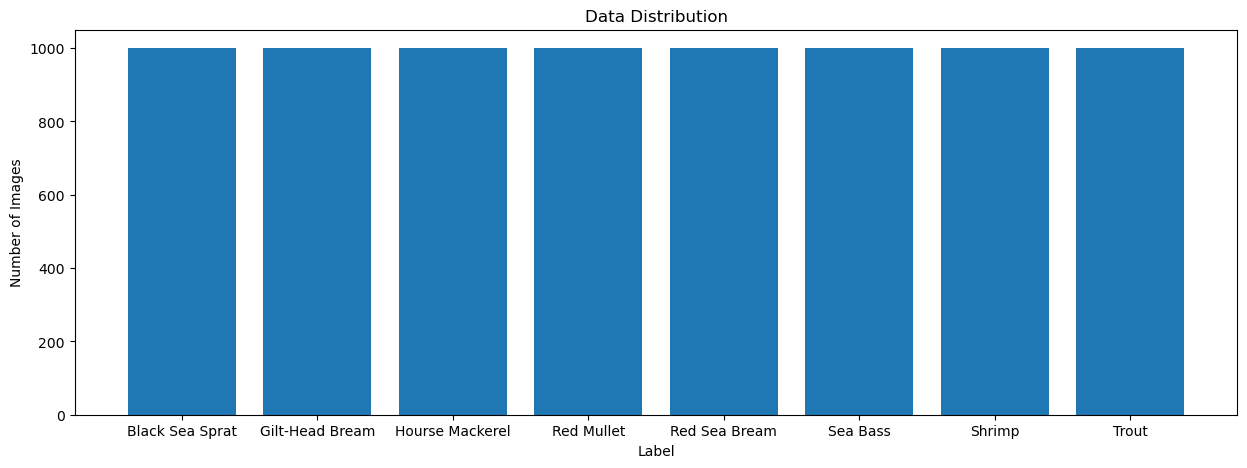

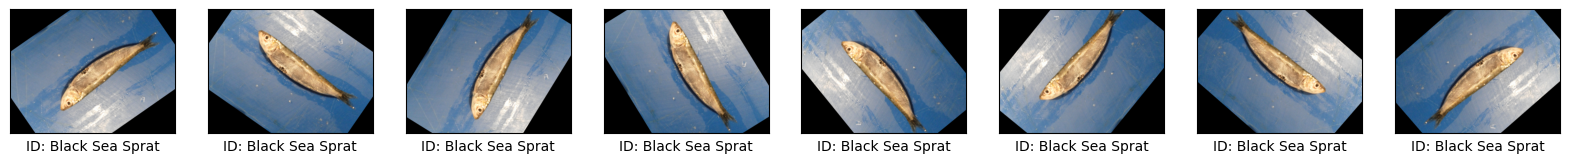

Data Characteristics:
Label: Black Sea Sprat, Number of Images: 1000
Label: Gilt-Head Bream, Number of Images: 1000
Label: Hourse Mackerel, Number of Images: 1000
Label: Red Mullet, Number of Images: 1000
Label: Red Sea Bream, Number of Images: 1000
Label: Sea Bass, Number of Images: 1000
Label: Shrimp, Number of Images: 1000
Label: Trout, Number of Images: 1000


In [4]:
# Load images and labels
all_images, all_labels, data_distribution = get_images_and_labels(dataset_directory)

# Display data distribution and sample images
plot_data_distribution(data_distribution)
display_sample(all_images, all_labels, rows=1, cols=8)
print_data_characteristic(data_distribution)

## Data Preparation

### Preprocessing

#### Skin Color Masking

Reference: [Human Skin Color Classification](https://medium.com/swlh/human-skin-color-classification-using-the-threshold-classifier-rgb-ycbcr-hsv-python-code-d34d51febdf8)

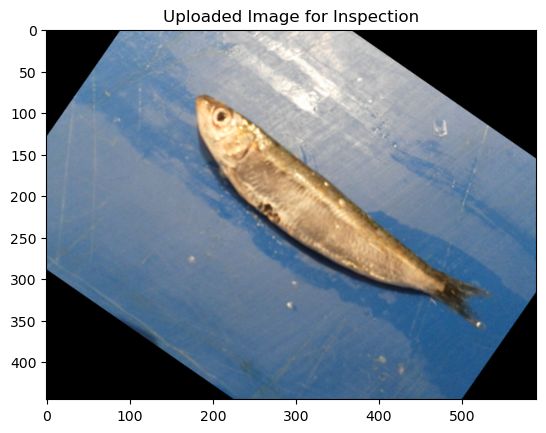

In [5]:
uploaded_image_path = 'Fish Dataset/Black Sea Sprat/00002.png'
uploaded_image = cv2.imread(uploaded_image_path)
if uploaded_image is None:
    print("Failed to load image.")
else:
    uploaded_image_rgb = cv2.cvtColor(uploaded_image, cv2.COLOR_BGR2RGB)
    plt.imshow(uploaded_image_rgb)
    plt.title('Uploaded Image for Inspection')
    plt.show()

In [6]:
# Directory path
input_dir = 'Fish Dataset'

# Function to process images and remove the background
def remove_background(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])
    lower_gray = np.array([0, 0, 40])
    upper_gray = np.array([180, 50, 220])
    lower_dark_gray = np.array([0, 0, 10])
    upper_dark_gray = np.array([180, 50, 70])
    lower_silver = np.array([0, 0, 170])
    upper_silver = np.array([180, 50, 255])
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    mask_gray = cv2.inRange(hsv, lower_gray, upper_gray)
    mask_dark_gray = cv2.inRange(hsv, lower_dark_gray, upper_dark_gray)
    mask_silver = cv2.inRange(hsv, lower_silver, upper_silver)
    combined_mask = cv2.bitwise_or(mask_blue, mask_gray)
    combined_mask = cv2.bitwise_or(combined_mask, mask_dark_gray)
    combined_mask = cv2.bitwise_or(combined_mask, mask_silver)
    combined_mask_inv = cv2.bitwise_not(combined_mask)
    contours, _ = cv2.findContours(combined_mask_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        mask = np.zeros_like(combined_mask_inv)
        cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)
        isolated_fish = cv2.bitwise_and(image, image, mask=mask)
    else:
        isolated_fish = image
    return isolated_fish

# Function to process images in a directory
def process_images(input_dir):
    processed_images = []
    labels = []
    for subdir, _, files in os.walk(input_dir):
        label = os.path.basename(subdir)
        for file in files:
            image_path = os.path.join(subdir, file)
            image = cv2.imread(image_path)
            if image is not None:
                processed_image = remove_background(image)
                processed_images.append(processed_image)
                labels.append(label)
    return processed_images, labels

# Process the images and get the results
processed_images, all_labels = process_images(input_dir)

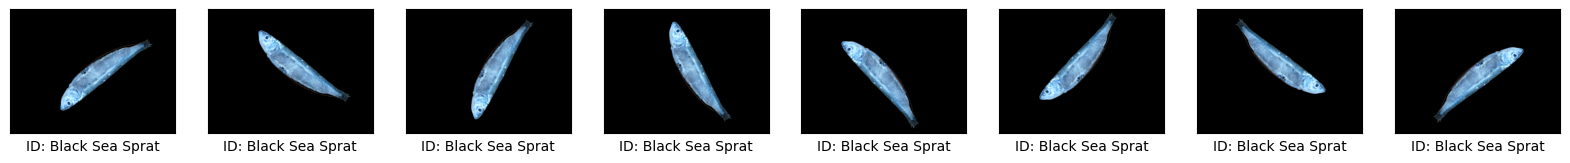

In [7]:
# Display processed images
display_sample(processed_images, all_labels, rows=1, cols=8)

In [8]:
total_items = len(processed_images)
print(f"Total items in processed_images: {total_items}")

Total items in processed_images: 8000


#### Gray Scale

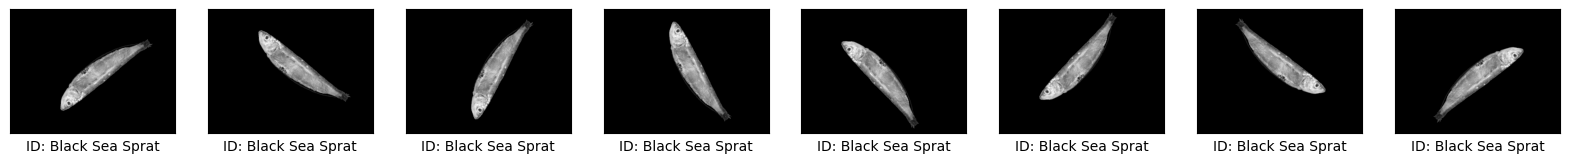

In [9]:
def convert_to_gray(processed_images, labels):
    gray_images = []
    for img in processed_images:
        gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray_images.append(gray_image)
    
    return gray_images

# Convert all images to grayscale
gray_images = convert_to_gray(processed_images, all_labels)

# Display grayscale images
display_sample(gray_images, all_labels, rows=1, cols=8, cmap='gray')

In [10]:
print(f"Total grayscale images processed: {len(gray_images)}")

Total grayscale images processed: 8000


### Features Extraction

In [15]:
dict_labels ={
    'Black Sea Sprat' : 0,
    'Gilt-Head Bream' : 1,
    'Hourse Mackerel' : 2,
    'Red Mullet' : 3,
    'Red Sea Bream' : 4,
    'Sea Bass' : 5,
    'Shrimp' : 6,
    'Trout' : 7,
}

In [16]:
print(all_labels)

['Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea 

In [17]:
def extract_glcm_features(images, labels, distances=[5], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True):
    features = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
    angle_labels = ['0', '45', '90', '135']
    df_data = pd.DataFrame()
    for i, image in enumerate(images):
        image = image.astype(int)
        glcm = graycomatrix(image, distances, angles, levels, symmetric, normed)
        for feature in features:
            for angle, angle_label in zip(angles, angle_labels):
                feat_a = graycoprops(glcm, feature)[0, int(angle*4/np.pi)]
                df_data.loc[i, f'{feature}_{angle_label}'] = feat_a
        for angle, angle_label in zip(angles, angle_labels):
            asm = np.sum(glcm[:, :, 0, int(angle*4/np.pi)]**2)
            entropy = -np.sum(glcm[:, :, 0, int(angle*4/np.pi)]*np.log2(glcm[:, :, 0, int(angle*4/np.pi)] + np.finfo(float).eps))
            df_data.loc[i, f'asm_{angle_label}'] = asm
            df_data.loc[i, f'entropy_{angle_label}'] = entropy
        df_data.loc[i, 'label'] = dict_labels[labels[i]]
    return df_data

In [19]:
df_glcm = extract_glcm_features(gray_images, labels=all_labels)

In [20]:
df_glcm

,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,...,correlation_135,asm_0,entropy_0,asm_45,entropy_45,asm_90,entropy_90,asm_135,entropy_135,label
0,197.890706,332.166020,222.707304,122.973501,2.913888,4.079884,3.287296,2.146139,0.906458,0.900913,...,0.967327,0.812835,1.780494,0.805284,1.846668,0.809884,1.805867,0.815427,1.745378,0.0
1,197.890706,122.973501,222.707304,332.166020,2.913888,2.146139,3.287296,4.079884,0.906458,0.909420,...,0.911745,0.812835,1.780494,0.815427,1.745378,0.809884,1.805867,0.805284,1.846668,0.0
2,264.595302,313.375272,157.127958,145.289081,3.505364,3.986905,2.633020,2.329982,0.903683,0.901531,...,0.961389,0.808872,1.811751,0.806242,1.840392,0.812896,1.771739,0.816105,1.749388,0.0
3,264.595302,145.289081,157.127958,313.375272,3.505364,2.329982,2.633020,3.986905,0.903683,0.909465,...,0.916720,0.808872,1.811751,0.816105,1.749388,0.812896,1.771739,0.806242,1.840392,0.0
4,199.597603,111.593857,205.231564,321.895343,3.123596,2.017150,3.012404,4.063438,0.904569,0.909956,...,0.914545,0.810635,1.807480,0.815671,1.748429,0.811222,1.803246,0.804402,1.860177,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,99.543471,99.117349,40.170408,92.530504,1.554757,1.615789,0.972966,1.520590,0.919360,0.918086,...,0.837088,0.804808,1.593381,0.806573,1.589719,0.819461,1.475827,0.808541,1.573058,7.0
7996,235.129680,150.367687,250.172250,377.137625,3.503052,2.846834,3.783105,4.742681,0.842501,0.846896,...,0.940640,0.687026,2.996587,0.688214,2.964239,0.684085,3.032499,0.679096,3.096749,7.0
7997,235.129680,377.137625,250.172250,150.367687,3.503052,4.742681,3.783105,2.846834,0.842501,0.834039,...,0.976333,0.687026,2.996587,0.679096,3.096749,0.684085,3.032499,0.688214,2.964239,7.0
7998,203.502111,211.648870,74.659203,133.624407,2.079850,2.164329,1.299850,1.746988,0.914554,0.913180,...,0.901244,0.797483,1.691271,0.797391,1.693454,0.809245,1.600639,0.803440,1.656545,7.0


In [21]:
df_glcm.to_csv('glcm_features.csv', index=False)

In [22]:

df_glcm = pd.read_csv('glcm_features.csv')



### Dimensionality Reduction

In [23]:
corr_glcm = pd.read_csv('glcm_features.csv')

In [24]:
print(corr_glcm.head())

   contrast_0  contrast_45  contrast_90  contrast_135  dissimilarity_0  \
0  197.890706   332.166020   222.707304    122.973501         2.913888   
1  197.890706   122.973501   222.707304    332.166020         2.913888   
2  264.595302   313.375272   157.127958    145.289081         3.505364   
3  264.595302   145.289081   157.127958    313.375272         3.505364   
4  199.597603   111.593857   205.231564    321.895343         3.123596   

   dissimilarity_45  dissimilarity_90  dissimilarity_135  homogeneity_0  \
0          4.079884          3.287296           2.146139       0.906458   
1          2.146139          3.287296           4.079884       0.906458   
2          3.986905          2.633020           2.329982       0.903683   
3          2.329982          2.633020           3.986905       0.903683   
4          2.017150          3.012404           4.063438       0.904569   

   homogeneity_45  ...  correlation_135     asm_0  entropy_0    asm_45  \
0        0.900913  ...        

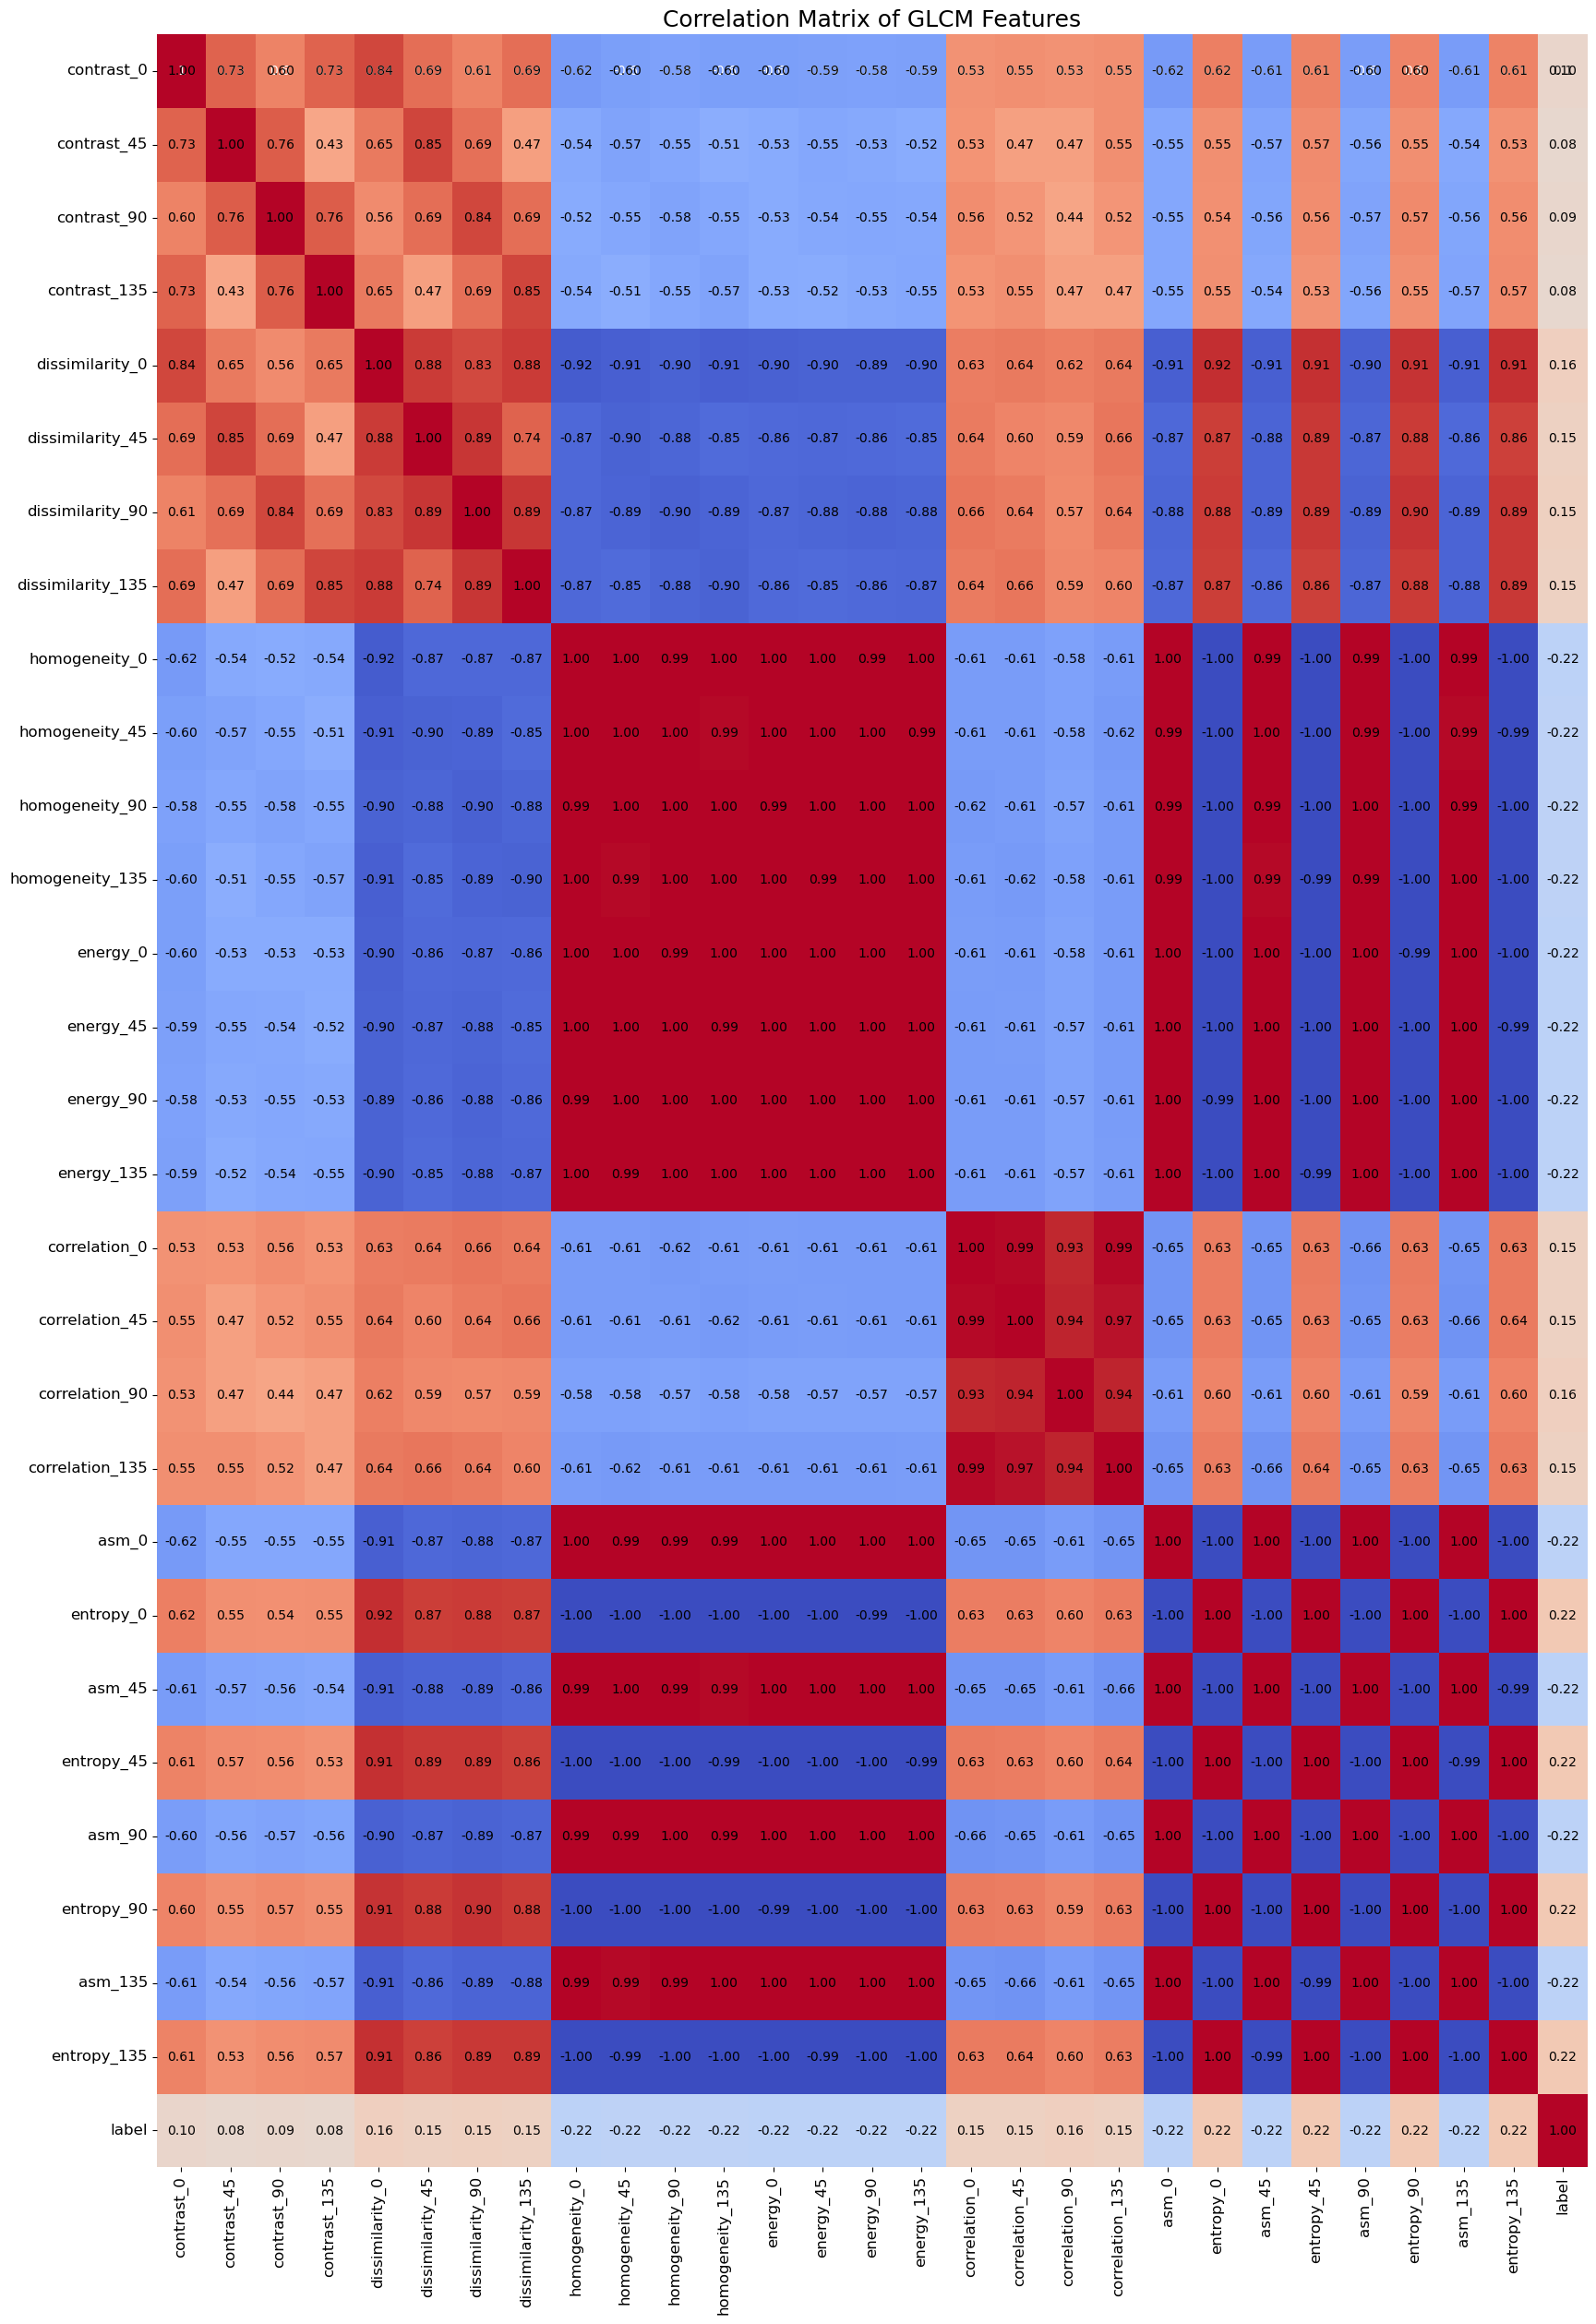

In [25]:
# Calculate the correlation matrix
corr_glcm = df_glcm.corr()

# Create a figure and axis for the plot with increased width
fig, ax = plt.subplots(figsize=(20, 30))

# Plot the heatmap using Seaborn
sns.heatmap(corr_glcm, annot=True, cmap='coolwarm', cbar=False, ax=ax)

# Customize the tick parameters for better readability
ax.tick_params(axis='x', labelsize=12, rotation=90)
ax.tick_params(axis='y', labelsize=12)

# Set y-tick labels with word wrapping and adjust rotation
yticks = ax.get_yticklabels()
new_labels = ['\n'.join(label.get_text().split(' ')) for label in yticks]
ax.set_yticklabels(new_labels, rotation=0)

# Add text annotations
for i in range(len(corr_glcm.index)):
    for j in range(len(corr_glcm.columns)):
        ax.text(j + 0.5, i + 0.5, f'{corr_glcm.iloc[i, j]:.2f}',
                ha="center", va="center", color="black", fontsize=10)

# Set the title for better context
ax.set_title('Correlation Matrix of GLCM Features', fontsize=18)

# Show the plot
plt.show()

In [28]:


# Check the shape of the dataframe
print("Shape of df_glcm:", df_glcm.shape)

Shape of df_glcm: (8000, 29)


In [31]:
# Split the data into features and labels
x, y = df_glcm.drop('label', axis=1), df_glcm['label']

# Check the shape of the dataframe x
print("Shape of x:", x.shape)

Shape of x: (8000, 28)


In [32]:
# Determine the appropriate number of components
n_samples, n_features = x.shape
n_components = min(n_samples, n_features)

# Initialize PCA with the correct number of components
pca = PCA(n_components=n_components)

# Apply PCA transformation
x_pca = pca.fit_transform(x)

x_pca.shape

(8000, 28)

In [33]:
pca = PCA(n_components=8)  # Adjust the number of components as needed
x_pca = pca.fit_transform(x)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [7.49449519e-01 1.61753351e-01 8.49170218e-02 3.75873324e-03
 1.16155014e-04 2.89949942e-06 1.19222121e-06 6.01486166e-07]


### Splitting Data

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6400, 8), (1600, 8), (6400,), (1600,))

### Normalization

In [35]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


## Modeling

### KNN Classifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=1, metric='cosine')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.865


### SVM Classifier

In [37]:
svm = SVC(kernel='rbf', C=30, gamma='auto')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.86875


### Random Forest Classifier

In [38]:
rfc = RandomForestClassifier(n_estimators=500, class_weight='balanced', n_jobs=-1, max_depth=50, min_samples_leaf=1, min_samples_split=2, bootstrap=False, criterion='gini')
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9875


## Evaluation

In [39]:
model_dict = {
    'KNN': knn,
    'SVM': svm,
    'RF': rfc
}
df_eval = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=model_dict.keys())


In [40]:
for model_name, model in model_dict.items():
    y_pred = model.predict(x_test)
    df_eval.loc[model_name, 'Accuracy'] = accuracy_score(y_test, y_pred)
    df_eval.loc[model_name, 'Precision'] = precision_score(y_test, y_pred, average='weighted')
    df_eval.loc[model_name, 'Recall'] = recall_score(y_test, y_pred, average='weighted')
    df_eval.loc[model_name, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')
    

In [41]:
df_eval

,Accuracy,Precision,Recall,F1 Score
KNN,0.865,0.865166,0.865,0.864369
SVM,0.86875,0.870147,0.86875,0.867937
RF,0.9875,0.987516,0.9875,0.987498


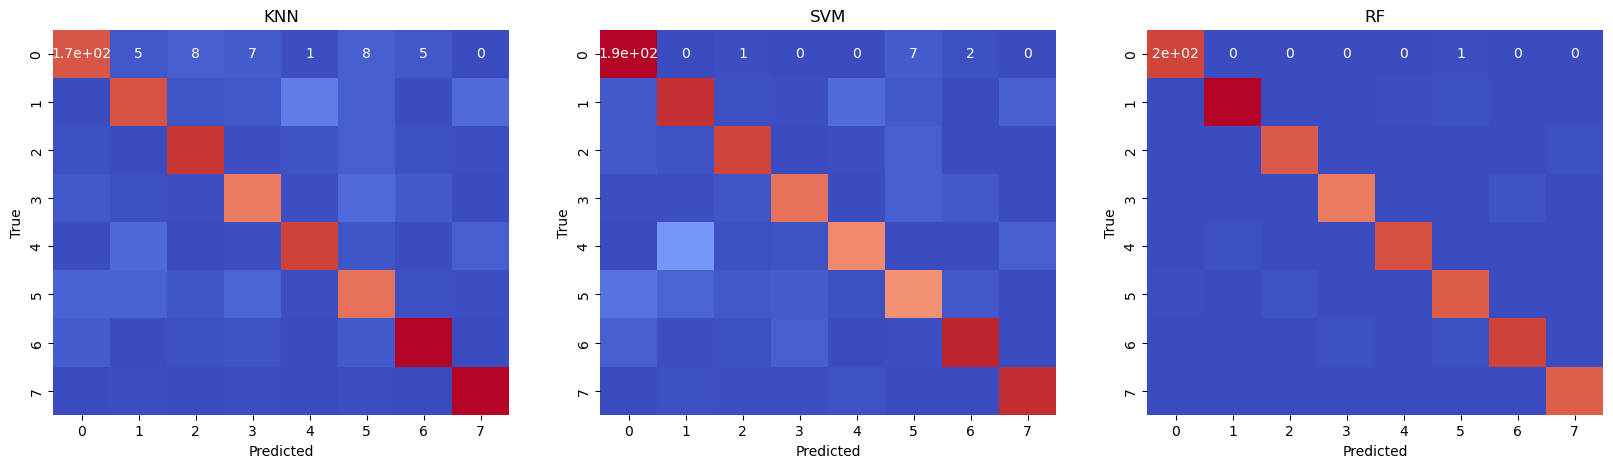

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for i, model_name in enumerate(model_dict.keys()):
    y_pred = model_dict[model_name].predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='coolwarm', cbar=False, ax=ax[i])
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('True')
    ax[i].set_title(model_name)
plt.show()